## Black Friday EDA 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# import train data
df_train = pd.read_csv('dataset/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
#import test data
df_test = pd.read_csv('dataset/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
# merge the dataset into one
df = df_train.append(df_test)
df.head()

/var/folders/l5/wmf9pb4s265b_jgzm5l9tq7h0000gn/T/ipykernel_28494/3532038100.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

### Drop unnecessary columns

In [10]:
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Handle missing values

In [11]:
p2_mode = df["Product_Category_2"].mode()[0]
p3_mode = df["Product_Category_3"].mode()[0]
df.fillna({
    "Product_Category_2": p2_mode,
    "Product_Category_3": p3_mode
}, inplace=True)

## Visualization

Gender

Text(0.5, 1.0, 'Gender frequency')

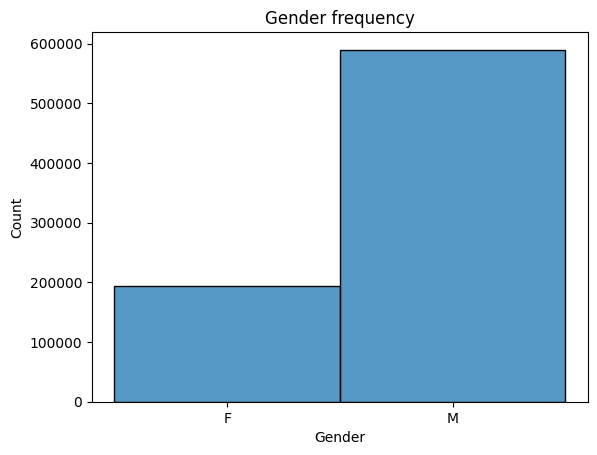

In [12]:
sns.histplot(df["Gender"])
plt.title("Gender frequency")

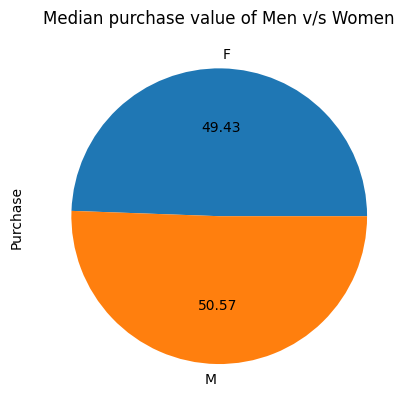

In [13]:
df.groupby("Gender")["Purchase"].median().plot.pie(autopct='%.2f')
plt.title("Median purchase value of Men v/s Women")
plt.show()

<AxesSubplot: xlabel='Product_Category_3', ylabel='Purchase'>

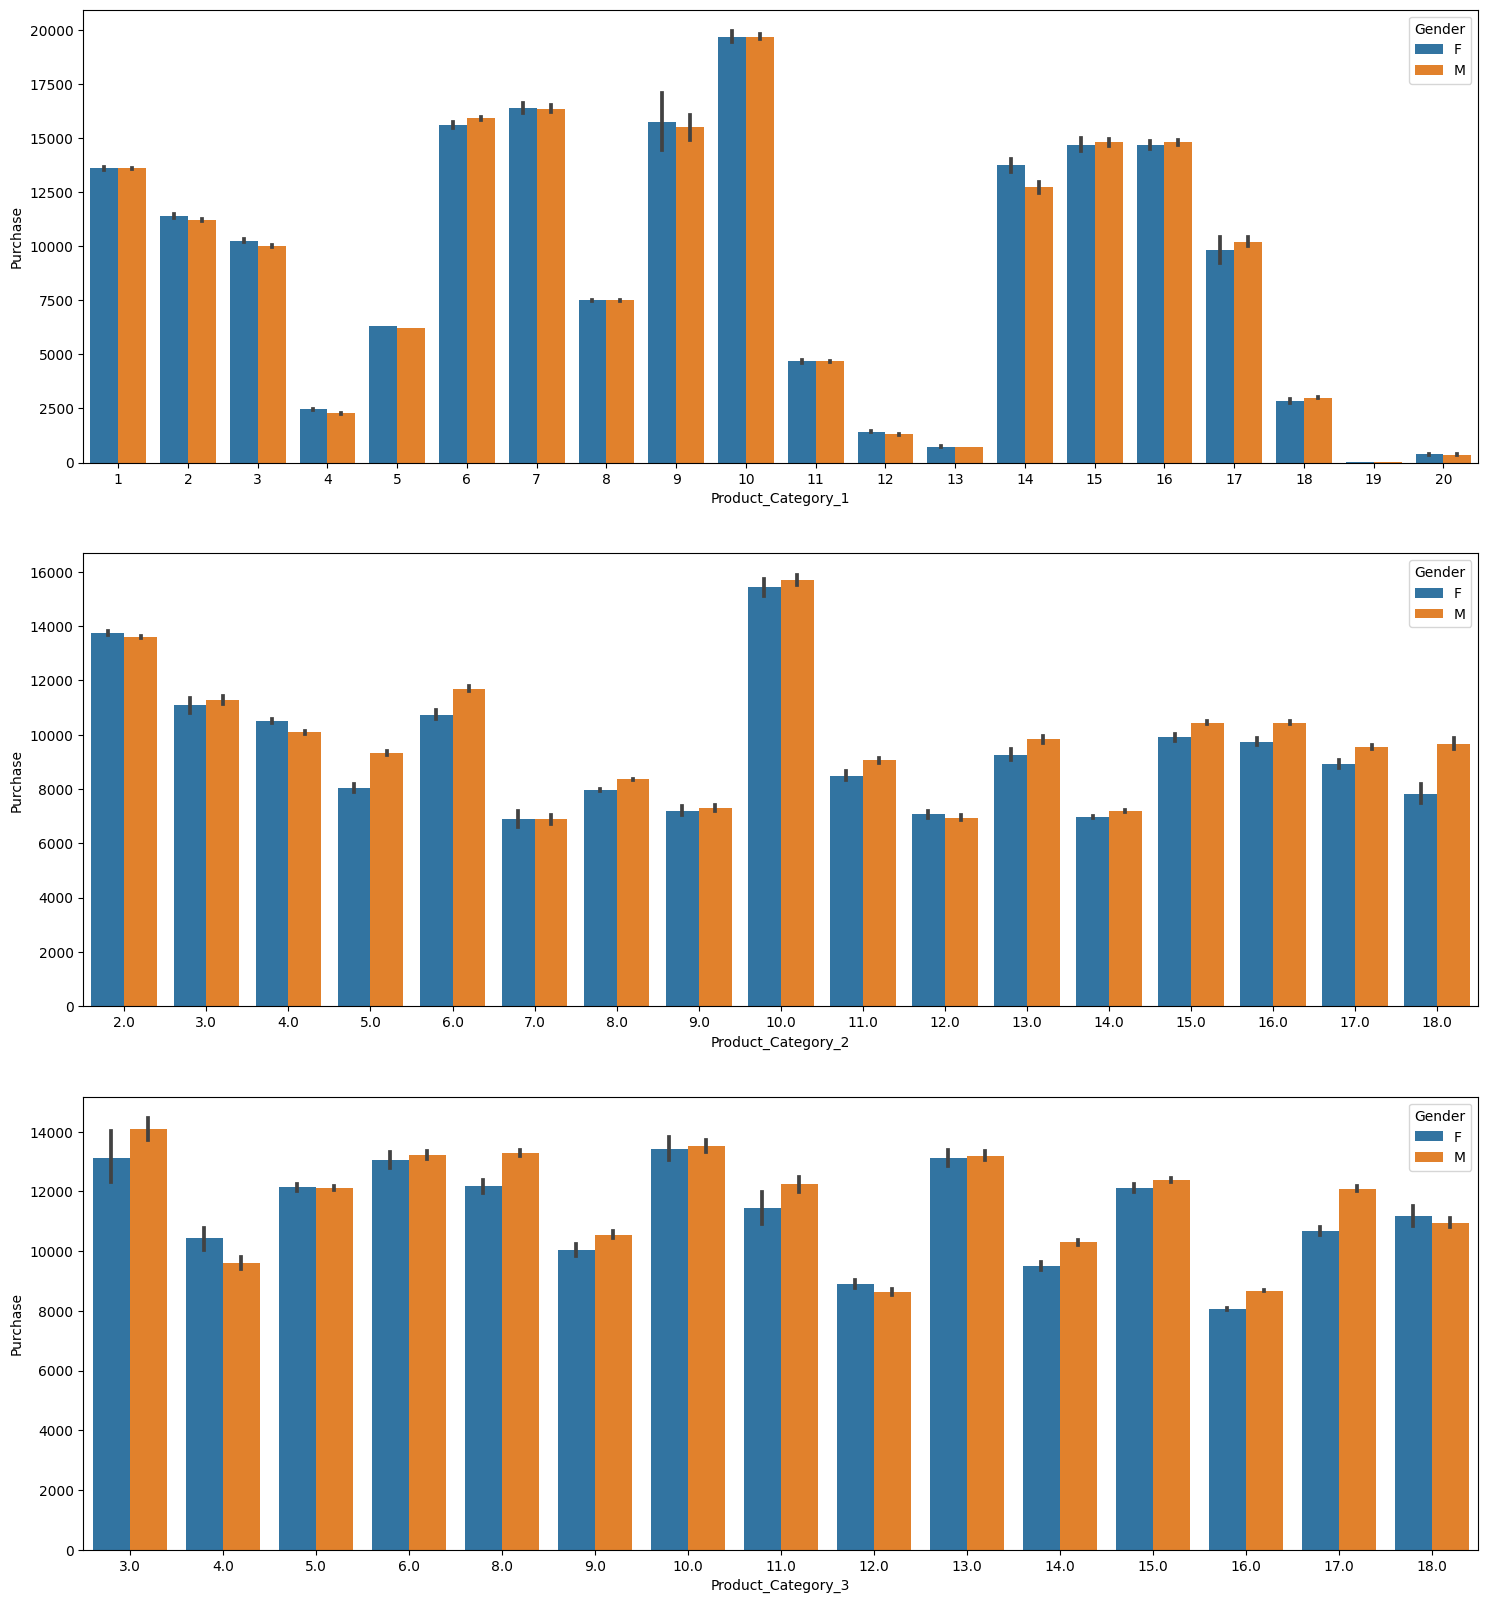

In [14]:
plt.figure(figsize=(18, 20))
plt.subplot(3, 1, 1)
sns.barplot(data=df, x="Product_Category_1", y="Purchase", hue="Gender")
plt.subplot(3, 1, 2)
sns.barplot(data=df, x="Product_Category_2", y="Purchase", hue="Gender")
plt.subplot(3, 1, 3)
sns.barplot(data=df, x="Product_Category_3", y="Purchase", hue="Gender")
# plt.subplot(4, 4, 2)
# sns.displot(df["Occupation"])
# plt.subplot(4, 4, 3)
# sns.displot(df["City_Category"])
# plt.subplot(4, 4, 4)
# sns.displot(df["Stay_In_Current_City_Years"])
# plt.subplot(4, 4, 5)
# sns.displot(df["Product_Category_1"])
# plt.subplot(4, 4, 6)
# sns.displot(df["Product_Category_2"])
# plt.subplot(4, 4, 7)
# sns.displot(df["Product_Category_3"])
# plt.subplot(4, 4, 8)
# sns.displot(df["Purchase"])

Age

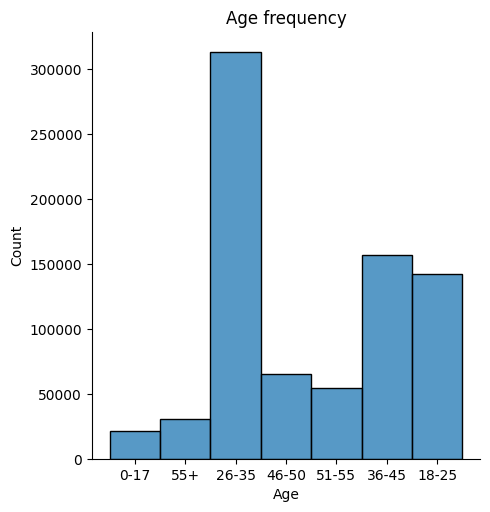

In [15]:
sns.displot(df["Age"])
plt.title("Age frequency")
plt.show()

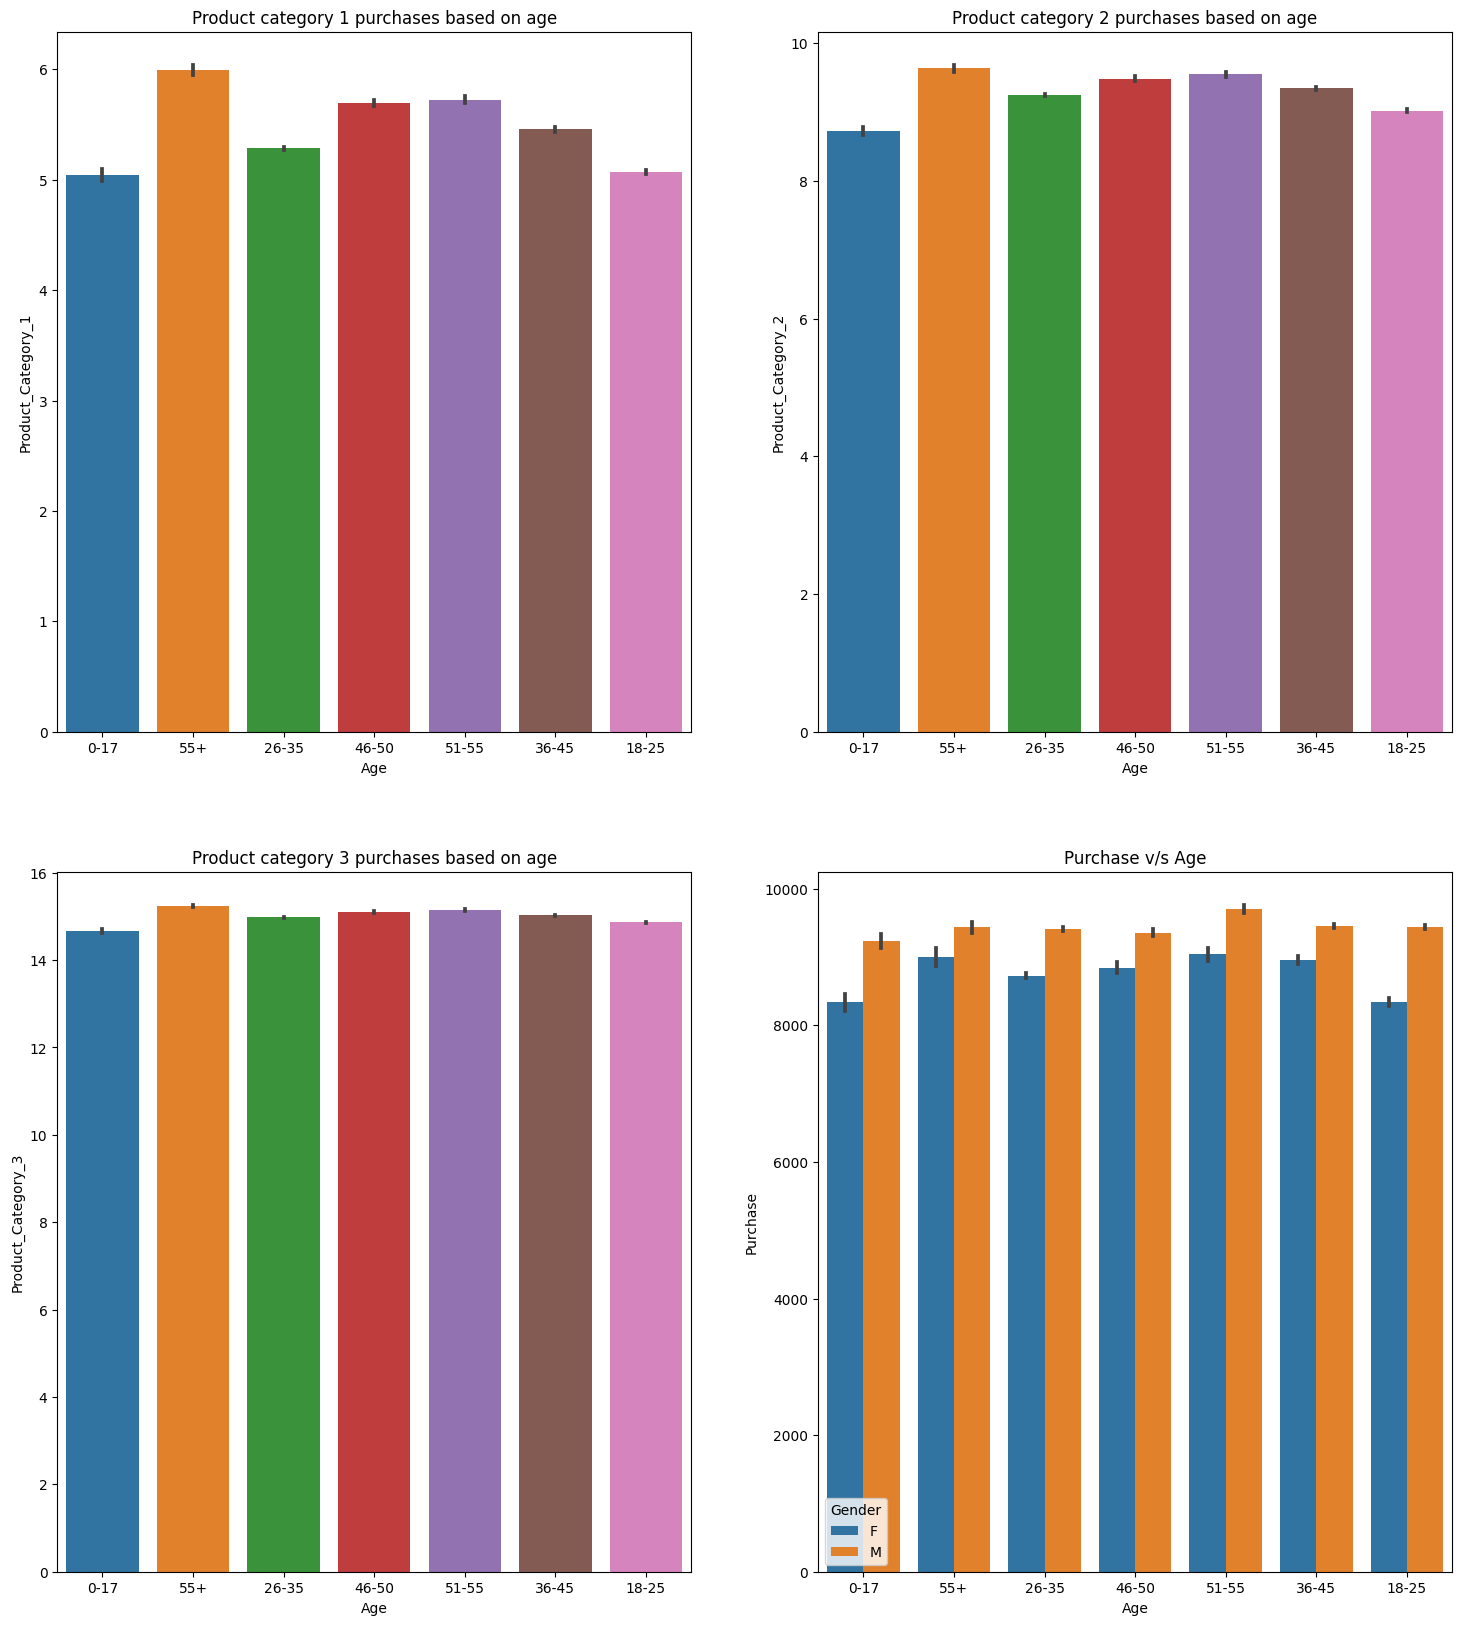

In [16]:
plt.figure(figsize=(18,20))
plt.subplot(2, 2, 1)
sns.barplot(data=df, x=df["Age"], y=df["Product_Category_1"])
plt.title("Product category 1 purchases based on age")
plt.subplot(2, 2, 2)
sns.barplot(data=df, x=df["Age"], y=df["Product_Category_2"])
plt.title("Product category 2 purchases based on age")
plt.subplot(2, 2, 3)
sns.barplot(data=df, x=df["Age"], y=df["Product_Category_3"])
plt.title("Product category 3 purchases based on age")
plt.subplot(2, 2, 4)
sns.barplot(x="Age", y="Purchase", hue="Gender", data = df)
plt.title("Purchase v/s Age")
plt.show()

City Category

Text(0.5, 1.0, 'City category frequency')

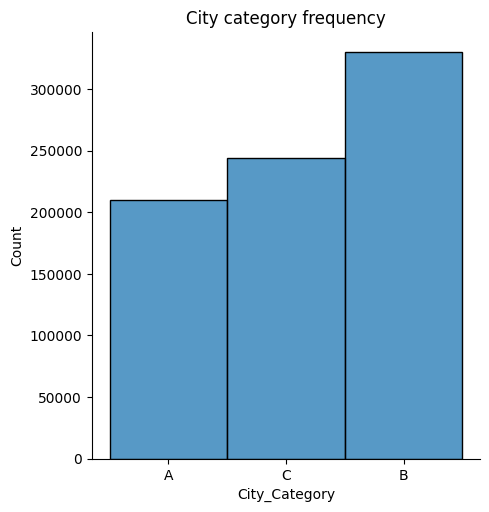

In [17]:
sns.displot(df["City_Category"])
plt.title("City category frequency")

Text(0.5, 1.0, 'Median of purchase based on city category')

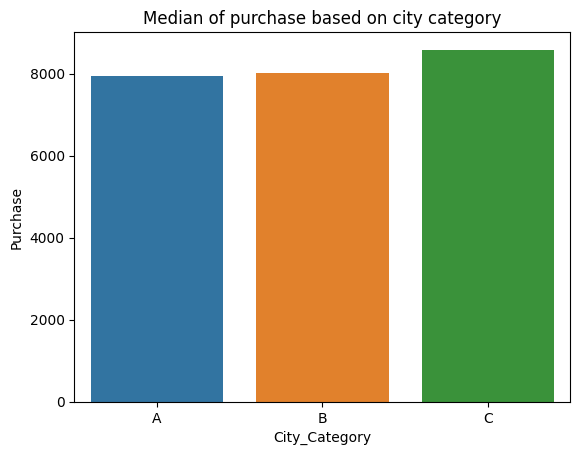

In [18]:
median_grouped = df.groupby("City_Category")["Purchase"].median().reset_index()
sns.barplot(data = median_grouped, x="City_Category", y="Purchase")
plt.title("Median of purchase based on city category")

Marital Status


Text(0.5, 1.0, 'Proportion of married and unmarried individuals shopping')

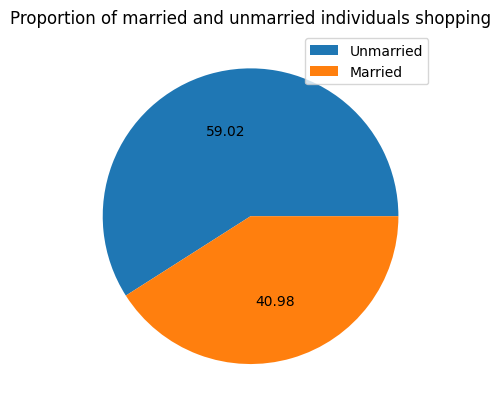

In [19]:
X = df["Marital_Status"].value_counts().reset_index()
X["index"]=X['index'].map({0: "Unmarried", 1: "Married"})
plt.pie(X["Marital_Status"], autopct='%.2f')
plt.legend(X['index'])
plt.title("Proportion of married and unmarried individuals shopping")


Text(0.5, 1.0, 'Median Purchase of married vs unmarried people')

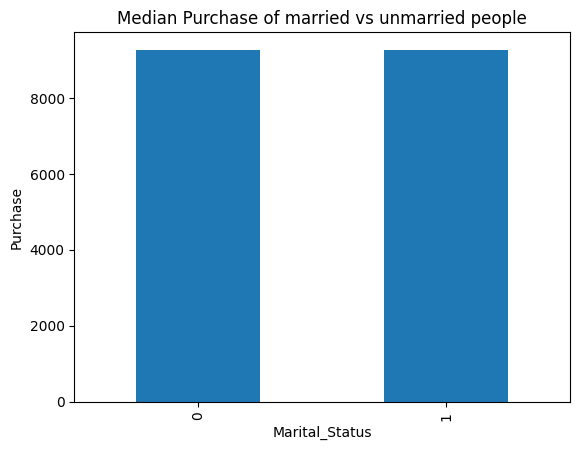

In [20]:
df.groupby("Marital_Status")["Purchase"].mean().plot.bar()
plt.ylabel("Purchase")
plt.title("Median Purchase of married vs unmarried people")

Purchase

Text(0.5, 1.0, 'Purchase distribution')

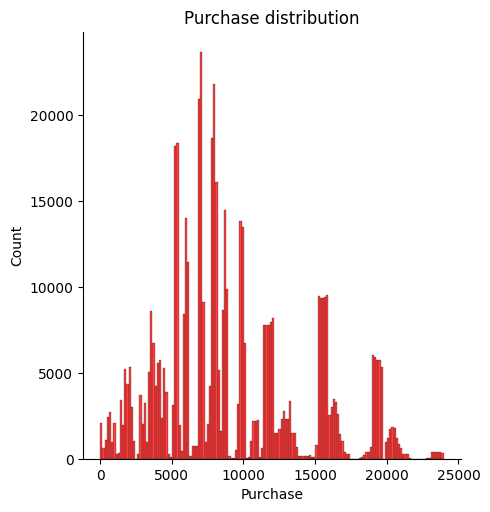

In [21]:
# purchase distribution
sns.displot(df["Purchase"], color="r")
plt.title("Purchase distribution")

<AxesSubplot: xlabel='Occupation', ylabel='Purchase'>

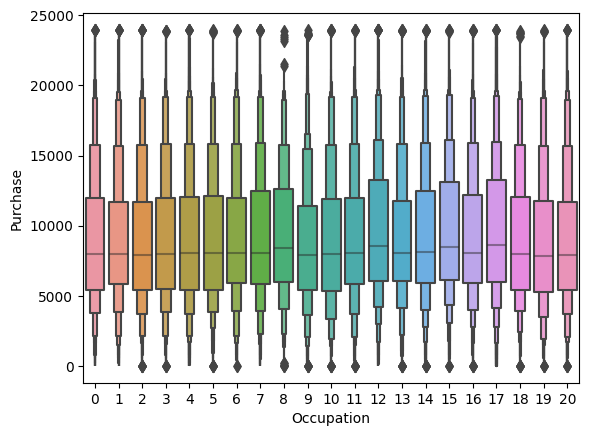

In [22]:
sns.boxenplot(x = df['Occupation'], y = df['Purchase'])

/var/folders/l5/wmf9pb4s265b_jgzm5l9tq7h0000gn/T/ipykernel_28494/221941791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


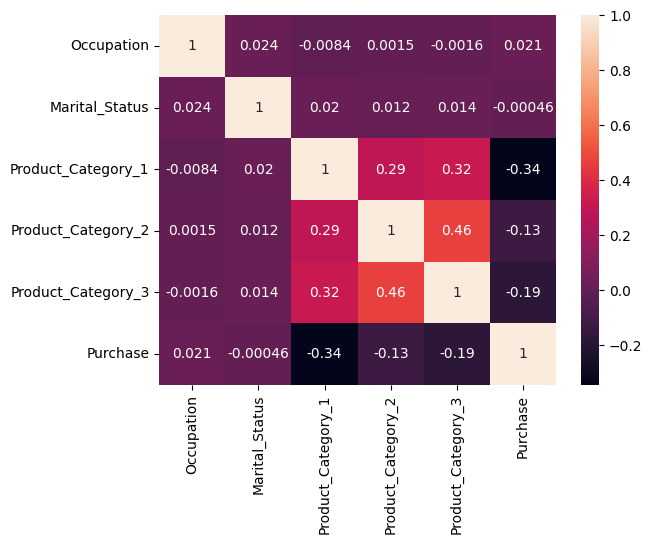

In [23]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Outlier Removal by IQR method

In [24]:
Q1 = df["Purchase"].quantile(.25)
Q3 = df["Purchase"].quantile(.75)
IQR = Q3-Q1
IQR

6231.0

In [25]:
lower_limit = Q1 -0.4*IQR 
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3330.6, 21400.5)

In [26]:
df = df[(df["Purchase"] > lower_limit) & (df["Purchase"] < upper_limit)]

In [27]:
df.groupby("Age")["Product_Category_3"].mean().reset_index()

,Age,Product_Category_3
0,0-17,14.600500
1,18-25,14.815168
2,26-35,14.933069
3,36-45,14.971111
4,46-50,15.071265
5,51-55,15.121097
6,55+,15.181598


Categorical encoding

In [28]:
# handling categorical feature gender
gender_dict = {"F": 0, "M": 1}
df['Gender'] = df['Gender'].map(gender_dict)

/var/folders/l5/wmf9pb4s265b_jgzm5l9tq7h0000gn/T/ipykernel_28494/3691913014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map(gender_dict)


In [29]:
# handling categorical feature age
age_dict = {value: key+1 for key, value in enumerate(sorted(df["Age"].unique()))}
df["Age"] = df["Age"].map(age_dict)
age_dict

/var/folders/l5/wmf9pb4s265b_jgzm5l9tq7h0000gn/T/ipykernel_28494/1494056572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = df["Age"].map(age_dict)


{'0-17': 1,
 '18-25': 2,
 '26-35': 3,
 '36-45': 4,
 '46-50': 5,
 '51-55': 6,
 '55+': 7}

In [30]:
# handling categorical feature "Stay_In_Current_City_Years"
df['Stay_In_Current_City_Years'].value_counts()

1     176330
2      92623
3      86859
4+     77042
0      67402
Name: Stay_In_Current_City_Years, dtype: int64

In [31]:
df['Stay_In_Current_City_Years'].replace({"4+": 4}, inplace=True)
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'], errors='coerce').astype(int)

/var/folders/l5/wmf9pb4s265b_jgzm5l9tq7h0000gn/T/ipykernel_28494/513954767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stay_In_Current_City_Years'].replace({"4+": 4}, inplace=True)
/var/folders/l5/wmf9pb4s265b_jgzm5l9tq7h0000gn/T/ipykernel_28494/513954767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'], errors='coerce').astype(int)


In [32]:
# handling categorical feature "City Category"
df["City_Category"].value_counts()

B    210417
C    156056
A    133783
Name: City_Category, dtype: int64

In [33]:
city_cat_dict = {"A": 1, "B": 2, "C": 3}
df['City_Category'] = df['City_Category'].map(city_cat_dict)

/var/folders/l5/wmf9pb4s265b_jgzm5l9tq7h0000gn/T/ipykernel_28494/1832734629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City_Category'] = df['City_Category'].map(city_cat_dict)


Separating train data from test data

In [34]:
df_test = df[df["Purchase"].isnull()]
df_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [35]:
df_train = df[df["Purchase"].isnull()==False]
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
4,1,7,16,3,4,0,8,8.0,16.0,7969.0
5,1,3,15,1,3,0,1,2.0,16.0,15227.0
6,1,5,7,2,2,1,1,8.0,17.0,19215.0


In [36]:
X = df_train.iloc[ : , :-1]
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,1,2,0,3,8.0,16.0
1,0,1,10,1,2,0,1,6.0,14.0
4,1,7,16,3,4,0,8,8.0,16.0
5,1,3,15,1,3,0,1,2.0,16.0
6,1,5,7,2,2,1,1,8.0,17.0
...,...,...,...,...,...,...,...,...,...
545909,1,3,6,2,2,0,5,8.0,16.0
545910,1,3,6,2,2,0,8,8.0,16.0
545912,1,3,6,2,2,0,8,8.0,16.0
545913,1,3,6,2,2,0,5,8.0,16.0


In [37]:
y = df_train.iloc[ : , -1:]
y

,Purchase
0,8370.0
1,15200.0
4,7969.0
5,15227.0
6,19215.0
...,...
545909,3598.0
545910,9855.0
545912,7852.0
545913,7159.0


In [38]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [39]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
scaler = preprocessing.StandardScaler()
ct = ColumnTransformer(
    transformers=[('minmax', scaler, [-1])],
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

Model Building

1. Ridge

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [41]:
model = Ridge()
# Hyperparameter grids
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'fit_intercept': [True, False]})

In [42]:
# best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 10.0, 'fit_intercept': True}
Best Score: 0.09990466432945877


In [43]:
best_alpha = 10
best_fit_intercept = True
model1 = Ridge(alpha=best_alpha, fit_intercept=best_fit_intercept)
model1.fit(X_train, y_train)


Ridge(alpha=10)

In [44]:
y_pred = model1.predict(X_test)
ridge_mse = mean_squared_error(y_pred, y_test)
print("Mean Squared Error: ", ridge_mse)
print("Root Mean Squared Error: ", np.sqrt(ridge_mse))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Squared Error:  18955839.842861652
Root Mean Squared Error:  4353.830479343638
R2 Score:  0.09819120614324706


2. Random forest regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
reg_model = RandomForestRegressor(random_state=42, n_estimators=50, max_depth=20, min_samples_split = 4, min_samples_leaf = 2)
y_train_ravel = y_train.values.ravel()
reg_model.fit(X_train, y_train_ravel)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=50, random_state=42)

In [46]:
y_pred_reg = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", np.sqrt(mse))
print("R2 Score: ", r2_score(y_test, y_pred_reg))

Mean Squared Error:  8525791.633155309
Root Mean Squared Error:  2919.8958257368204
R2 Score:  0.5943923385560175


3. XG Boost Regressor Model

In [47]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(learning_rate = 0.3, n_estimators=200, max_depth=7)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
y_pred_xgb = xgb_reg.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error: ", mse_xgb)
print("Root Mean Squared Error: ", np.sqrt(mse_xgb))
print("R2 Score: ", r2_score(y_test, y_pred_xgb))

Mean Squared Error:  8170223.816446751
Root Mean Squared Error:  2858.3603370545766
R2 Score:  0.6113081906933193


In [49]:
import pickle

In [50]:
model_filename = 'xg_boost.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(xgb_reg, file)
